In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics

In [7]:
df = pd.read_csv('wine.xls', names = ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#NO missing data

In [23]:
df.Cultivator.value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [26]:
df_clus=df.drop('Cultivator',axis=1)

In [28]:
X=df_clus
y=df['Cultivator']

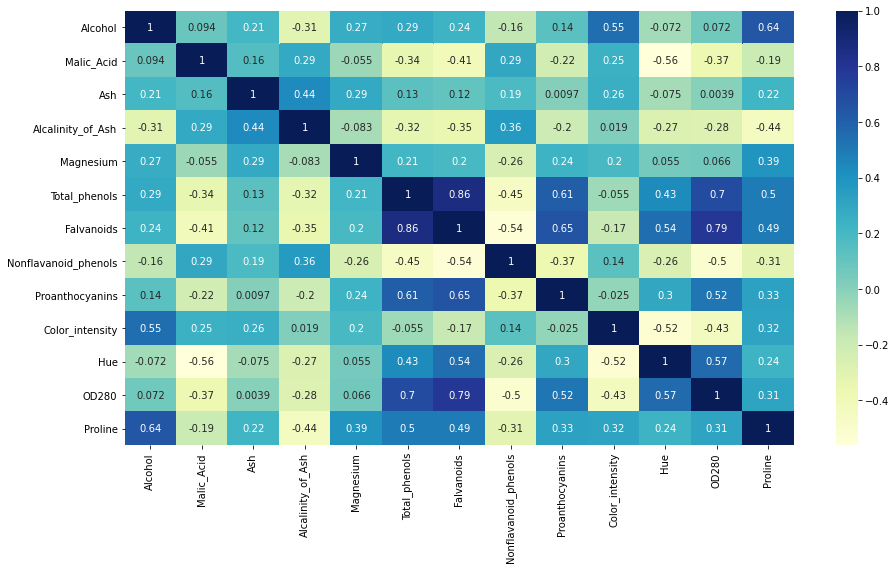

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [39]:
from scipy.stats import zscore
X_scale=X.apply(zscore)

In [40]:
X_scale

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [42]:
kmeans=KMeans(n_clusters=3,random_state=101)

In [43]:
kmeans.fit(X_scale)

KMeans(n_clusters=3, random_state=101)

In [50]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_scale))
centroid_df

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


In [51]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_number']))
df['cluster_number'] = df_labels['cluster_number'].astype('category')

In [53]:
df.cluster_number.value_counts()

2    65
0    62
1    51
Name: cluster_number, dtype: int64

In [59]:
Z = linkage(X_scale, method='complete')
c, coph_dists = cophenet(Z , pdist(X_scale))
c

0.5916829459078577

In [61]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [62]:
model.fit(X_scale)

AgglomerativeClustering(n_clusters=3)

In [63]:
X_scale['cluster_labels'] = model.labels_
X_scale['cluster_labels'].value_counts()

2    64
0    58
1    56
Name: cluster_labels, dtype: int64

In [64]:
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(178, 13)

In [65]:
cov_matrix = np.cov(X_std, rowvar=False)

In [67]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

In [68]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.732436977583594, 2.5110809296451237, 1.4542418678464688, 0.924165866824874, 0.8580486765371118, 0.6452822124678538, 0.554141466245784, 0.350466274946254, 0.2905120326939777, 0.2523200103608245, 0.22706428173088566, 0.16972373898012127, 0.10396199182075358]


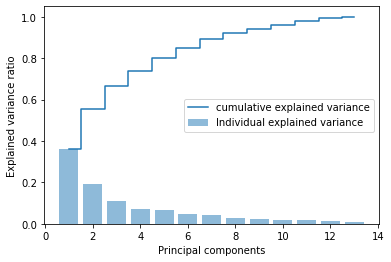

In [80]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained) 

plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [89]:
P_reduce = np.array(eigvectors_sort[0:7]).transpose()
Proj_data_2D = np.dot(X_std,P_reduce)

In [85]:
from sklearn import model_selection

test_size = 0.30
seed = 11 
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)

In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)
acc=metrics.accuracy_score(y_test, y_predict)
print(acc)

0.9629629629629629


In [87]:
cm= metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[21  0  0]
 [ 1 20  1]
 [ 0  0 11]]


In [88]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.91      0.95        22
           3       0.92      1.00      0.96        11

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

